# Importando dependências

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

# Carregando os dados

In [2]:
data = pd.read_csv('data/athlete_events.csv')
regions = pd.read_csv('data/noc_regions.csv')

Coletando informações sobre os dois conjuntos de dados

In [3]:
data.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [4]:
data.shape

(271116, 15)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [6]:
data.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


In [7]:
regions.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


Como há uma coluna chamada NOC no DataFrame 'data', iremos fazer um merge desses dos DataFrames

In [8]:
data_merged = data.merge(regions, how='left', on='NOC')
data_merged.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


Estou interessado somente nos Jogos Olímpicos de Verão.

Então irei observer a coluna 'Season', para ver se existem somente 'Summer' e 'Winter' ou se há algum erro de digitação.

In [9]:
data_merged['Season'].unique()

array(['Summer', 'Winter'], dtype=object)

In [10]:
data_merged.shape

(271116, 17)

Separando os dados dos Jogos Olímpicos de Verão:

In [11]:
summer_olympic = data_merged[data_merged['Season'] == 'Summer']
summer_olympic.head()


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
26,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,Netherlands,NaN


In [12]:
summer_olympic.shape

(222552, 17)

## Analisando a distribuição de medalhas

### Distribuição de medalhas entre os países

In [13]:
summer_olympic['Medal'].unique()

array([nan, 'Gold', 'Bronze', 'Silver'], dtype=object)

Filtrando somente os medalhistas

In [14]:
medals_filter = ((summer_olympic['Medal'] == 'Gold') | 
                 (summer_olympic['Medal'] == 'Silver') | 
                 (summer_olympic['Medal'] == 'Bronze'))

medals = summer_olympic[medals_filter]

Vendo o número total de medalhas por país

In [15]:
total_medals_countries = medals['region'].value_counts().reset_index()
total_medals_countries = total_medals_countries.rename(columns={'count': 'Total medals'})
total_medals_countries.head(10)

,region,Total medals
0,USA,5002
1,Russia,3188
2,Germany,3126
3,UK,1985
4,France,1627
5,Italy,1446
6,Australia,1333
7,Hungary,1123
8,Sweden,1108
9,Netherlands,918


Plotando o gráfico com os primeiros cinco do ranking

Text(0.5, 1.0, 'Número total de medalhas por país')

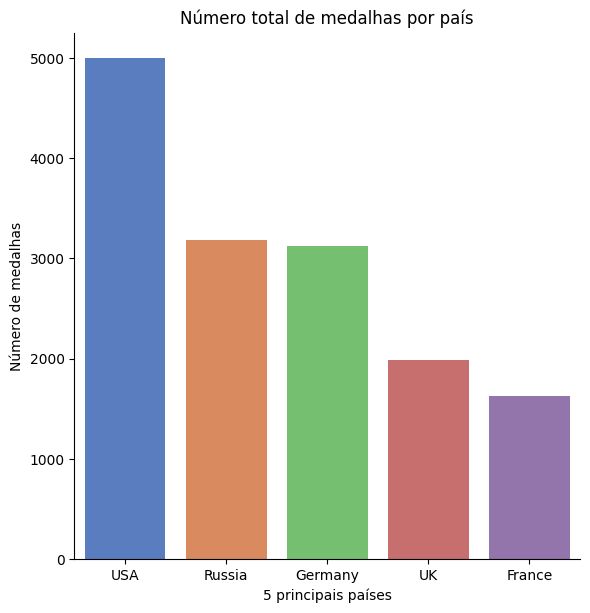

In [16]:
g = sns.catplot(x='region', 
                y='Total medals', 
                data=total_medals_countries.head(5),
                height=6, 
                kind='bar', 
                palette='muted', 
                hue='region', 
                legend=False)
g.set_xlabels(('5 principais países'))
g.set_ylabels('Número de medalhas')
plt.title('Número total de medalhas por país')

### Distribuição de medalhas de Ouro, Prata e Bronze por país

In [17]:
medals_distribution_countries = (medals.groupby('region')['Medal']
                                        .value_counts()
                                        .unstack(fill_value=0)
                                        .reset_index()
                                        .rename_axis('', axis=1)
                                        .sort_values(by=['Gold', 'Silver', 'Bronze'], ascending=False))

columns = ['region', 'Gold', 'Silver', 'Bronze']
medals_distribution_countries = medals_distribution_countries[columns].rename(columns={'region': 'Country'})
medals_distribution_countries.head(10)

,Country,Gold,Silver,Bronze
123,USA,2472,1333,1197
98,Russia,1220,974,994
41,Germany,1075,987,1064
122,UK,636,729,620
57,Italy,518,474,454
38,France,465,575,587
48,Hungary,432,328,363
4,Australia,362,456,515
110,Sweden,354,396,358
20,China,335,319,259


Plotando o gráfico com os primeiros cinco do ranking ordenados por medalhas de Ouro, Prata e Bronze.

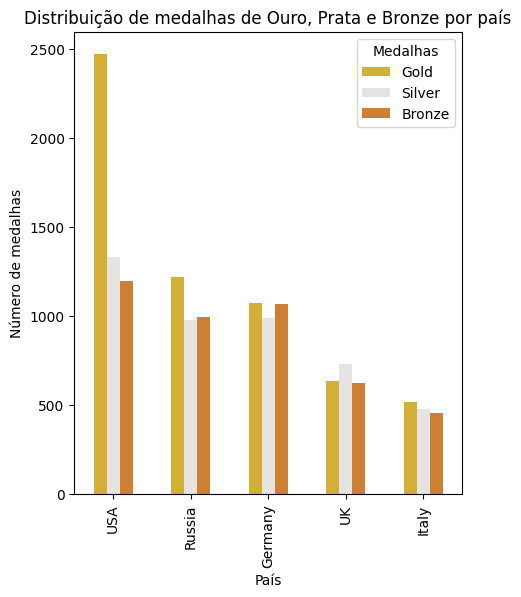

In [18]:
graph  = medals_distribution_countries.head(5)
my_colors = [(212/255, 175/255, 55/255), (229/255, 228/255, 226/255), (205/255, 127/255, 50/255)]
graph.plot(kind='bar', x='Country', figsize=(5, 6), color=my_colors)
plt.title('Distribuição de medalhas de Ouro, Prata e Bronze por país')
plt.xlabel('País')
plt.ylabel('Número de medalhas')
plt.legend(title='Medalhas')
plt.show()

### Atletas com mais medalhas

In [19]:
medals_per_athlete = medals['Name'].value_counts().reset_index(name='Total medals')
medals_per_athlete.head(10)

,Name,Total medals
0,"Michael Fred Phelps, II",28
1,Larysa Semenivna Latynina (Diriy-),18
2,Nikolay Yefimovich Andrianov,15
3,Borys Anfiyanovych Shakhlin,13
4,Takashi Ono,13
5,Edoardo Mangiarotti,13
6,Paavo Johannes Nurmi,12
7,Birgit Fischer-Schmidt,12
8,"Jennifer Elisabeth ""Jenny"" Thompson (-Cumpelik)",12
9,Sawao Kato,12


Plotando o gráfico dos 10 atletas com mais medalhas

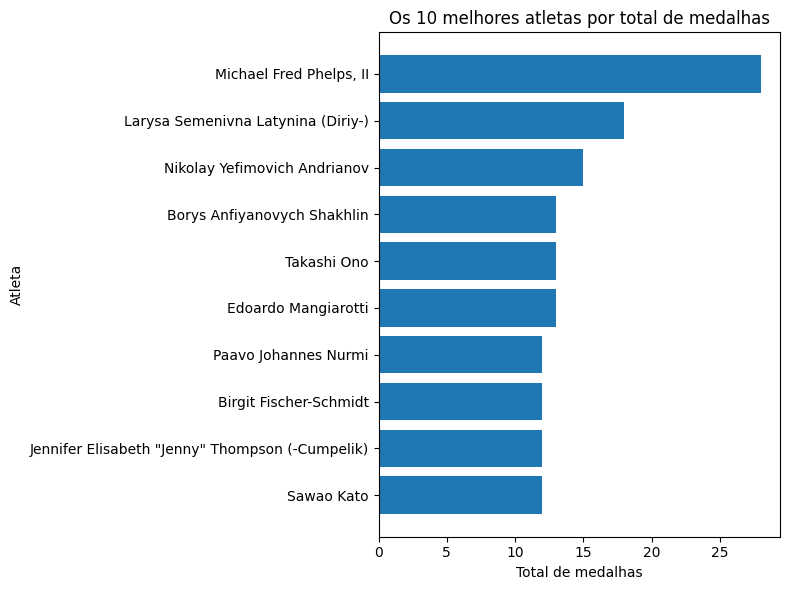

In [20]:
plt.figure(figsize=(8, 6))
plt.barh(medals_per_athlete.head(10)['Name'], medals_per_athlete.head(10)['Total medals'])
plt.xlabel('Total de medalhas')
plt.ylabel('Atleta')
plt.title('Os 10 melhores atletas por total de medalhas')
plt.gca().invert_yaxis() 
plt.tight_layout()
plt.show()

## Faixa etária dos atletas ao longo das edições

Verificando se existem linhas com valores ausentes para 'Age'

In [21]:
summer_olympic.info()

<class 'pandas.core.frame.DataFrame'>
Index: 222552 entries, 0 to 271110
Data columns (total 17 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      222552 non-null  int64  
 1   Name    222552 non-null  object 
 2   Sex     222552 non-null  object 
 3   Age     213363 non-null  float64
 4   Height  170695 non-null  float64
 5   Weight  168698 non-null  float64
 6   Team    222552 non-null  object 
 7   NOC     222552 non-null  object 
 8   Games   222552 non-null  object 
 9   Year    222552 non-null  int64  
 10  Season  222552 non-null  object 
 11  City    222552 non-null  object 
 12  Sport   222552 non-null  object 
 13  Event   222552 non-null  object 
 14  Medal   34088 non-null   object 
 15  region  222182 non-null  object 
 16  notes   4401 non-null    object 
dtypes: float64(3), int64(2), object(12)
memory usage: 30.6+ MB


Como existem valores ausentes, então removemos esses valores para a coluna 'Age'

In [22]:
age_over_time = summer_olympic.dropna(subset=['Age'])

Plotando o gráfico

Text(0.5, 1.0, 'Faixa etária dos atletas ao longo do tempo')

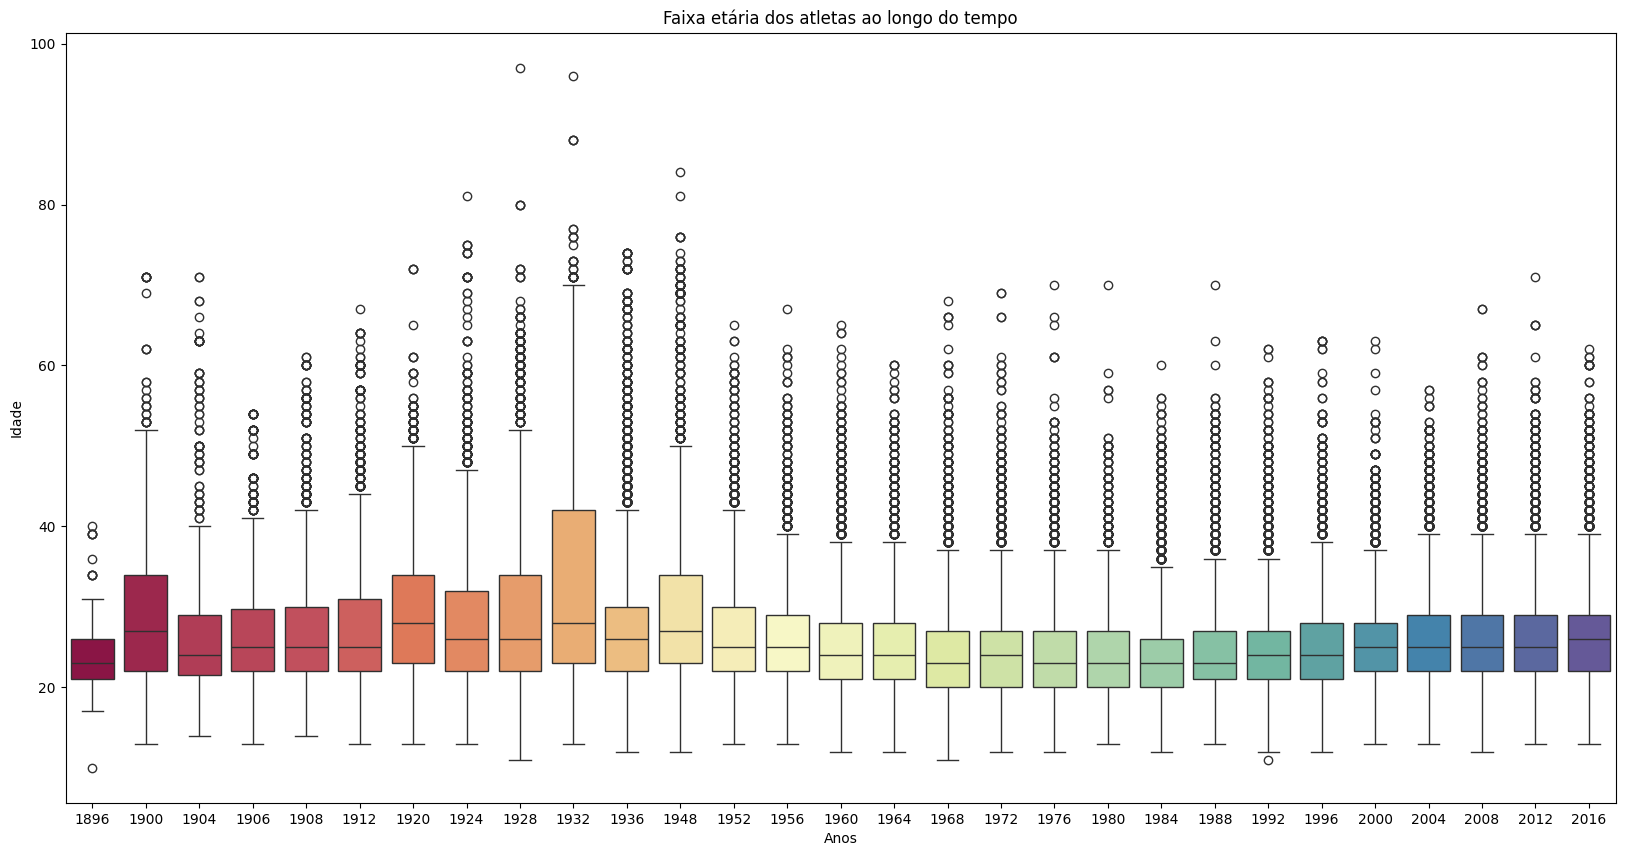

In [23]:
plt.figure(figsize=(20, 10))
custom_palette = sns.color_palette("Spectral", as_cmap=True)
sns.boxplot(x='Year', y='Age', data=age_over_time, palette=custom_palette, hue='Year', legend=False)
plt.xlabel('Anos')
plt.ylabel('Idade')
plt.title('Faixa etária dos atletas ao longo do tempo')

### Faixa etária de atletas do sexo masculino nas Olimpíadas

Text(0.5, 1.0, 'Faixa etária dos atletas masculinos ao longo do tempo')

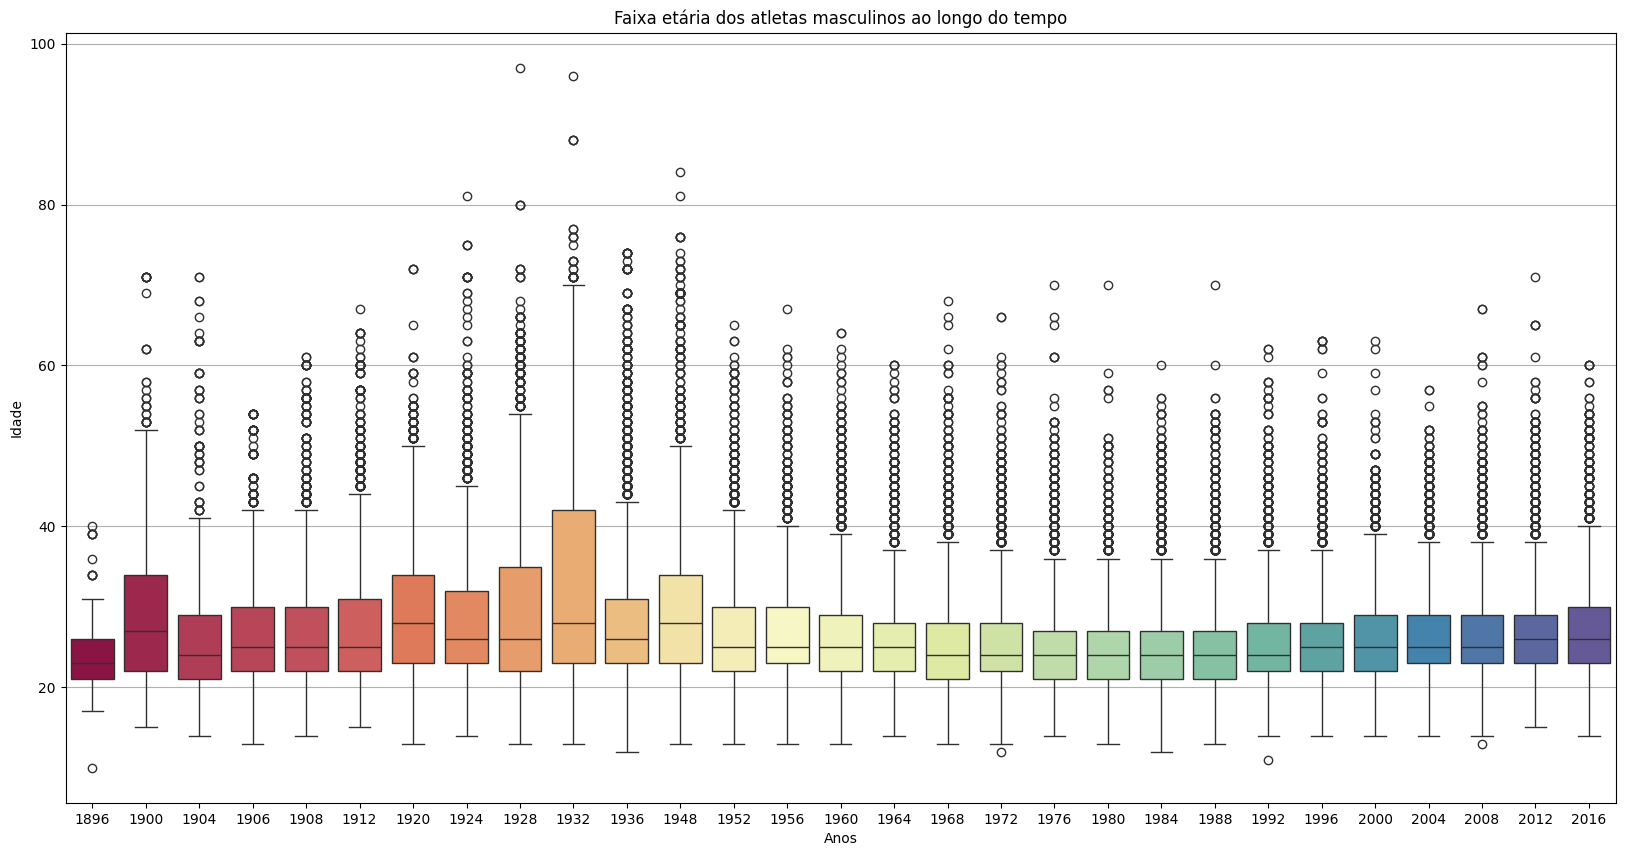

In [24]:
age_over_time_men = age_over_time[age_over_time['Sex'] == 'M']

plt.figure(figsize=(20, 10))
sns.boxplot(x='Year', y='Age', data=age_over_time_men, palette=custom_palette, hue='Year', legend=False)
plt.xlabel('Anos')
plt.ylabel('Idade')
plt.grid(True, axis='y')
plt.title('Faixa etária dos atletas masculinos ao longo do tempo')

### Faixa etária de atletas do sexo feminino nas Olimpíadas

Text(0.5, 1.0, 'Faixa etária das atletas femininas ao longo do tempo')

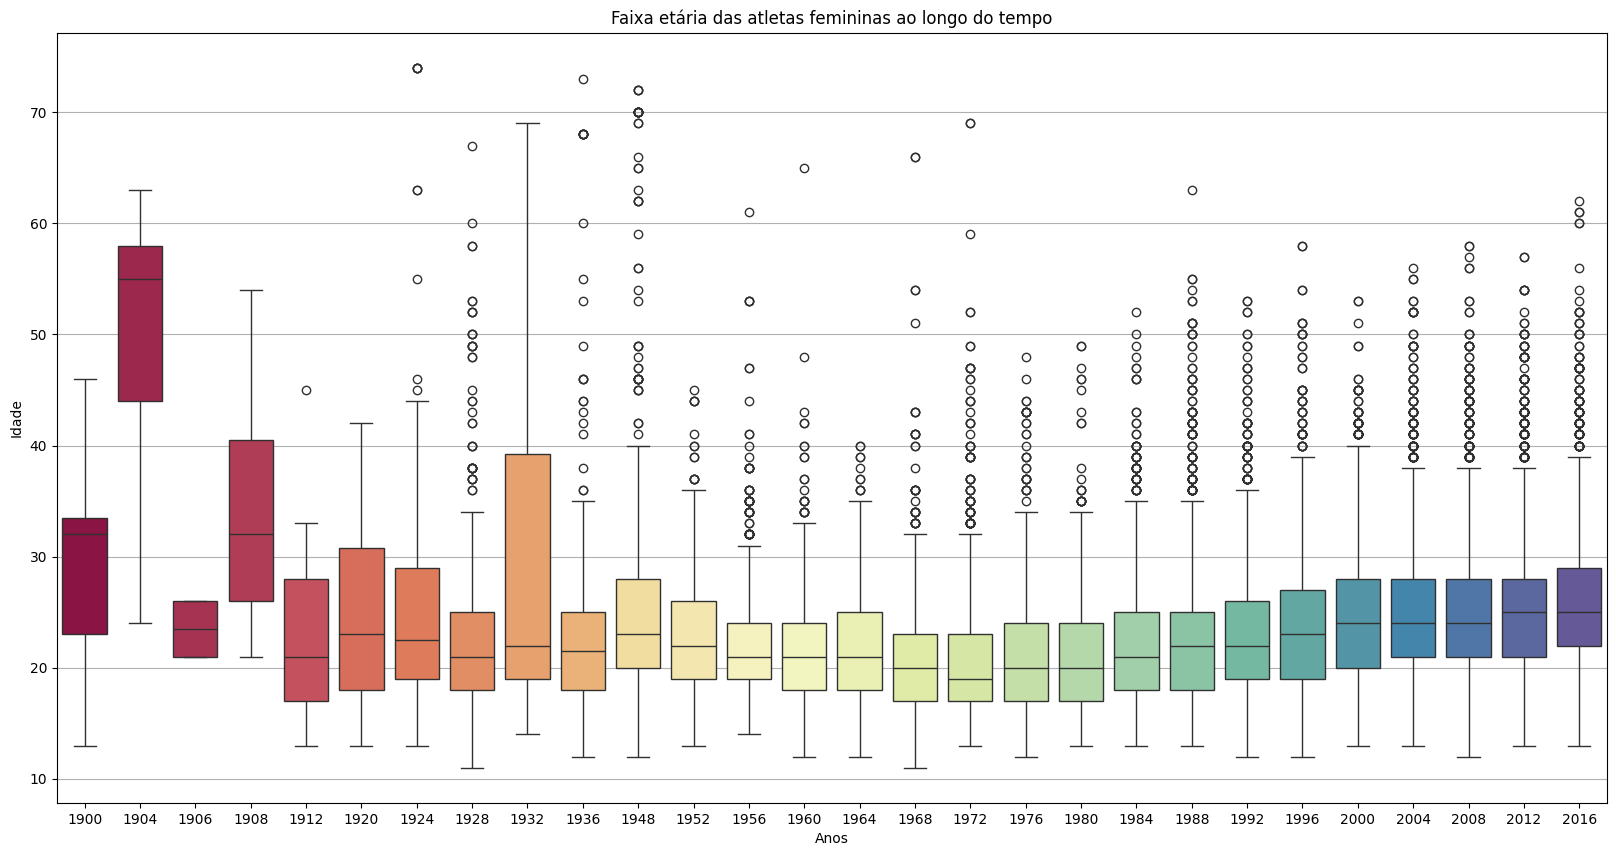

In [25]:
age_over_time_women = age_over_time[age_over_time['Sex'] == 'F']

plt.figure(figsize=(20, 10))
sns.boxplot(x='Year', y='Age', data=age_over_time_women, palette=custom_palette, hue='Year', legend=False)
plt.xlabel('Anos')
plt.ylabel('Idade')
plt.grid(True, axis='y')
plt.title('Faixa etária das atletas femininas ao longo do tempo')

### Média de idade dos atletas nos cinco esportes com maior participação ao longo dos anos

Identificando a frequência dos esportes ao longo das edições das Olimpíadas de Verão

In [26]:
sport_counts = summer_olympic.groupby('Sport')['Year'].nunique().sort_values(ascending=False).reset_index()

Identificando os cinco esportes com maior frequência ao longo dos anos

In [27]:
top_five_sports = sport_counts.Sport.head(5).tolist()

Filtrando para incluir apenas os dados relacionados aos cinco principais esportes


In [28]:
top_five_filter = age_over_time['Sport'].isin(top_five_sports)
top_five_data = age_over_time[top_five_filter]

Agrupando por esporte e ano e calculando a média da idade

In [29]:
mean_age_by_sport_over_time = top_five_data.groupby(['Sport', 'Year'])['Age'].mean().reset_index()

Plotando o gráfico

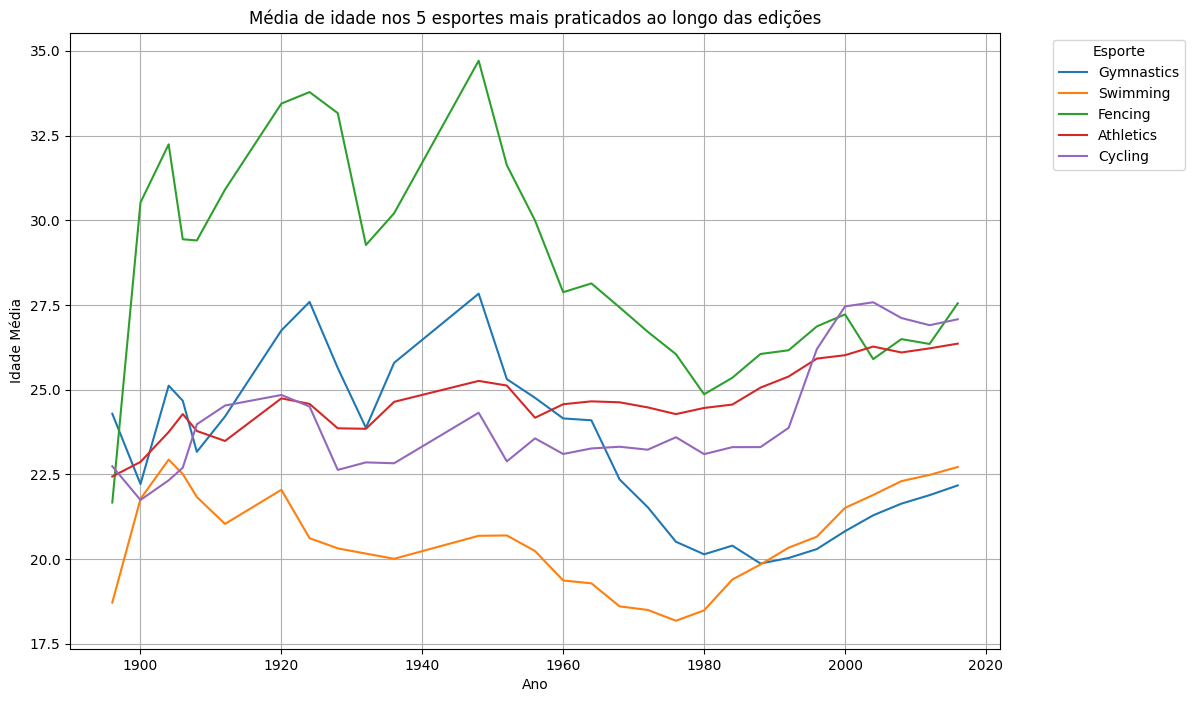

In [30]:
plt.figure(figsize=(12, 8))
for sport in top_five_sports:
    sport_data = mean_age_by_sport_over_time[mean_age_by_sport_over_time['Sport'] == sport]
    plt.plot(sport_data['Year'], sport_data['Age'], label=sport)

plt.title('Média de idade nos 5 esportes mais praticados ao longo das edições')
plt.xlabel('Ano')
plt.ylabel('Idade Média')
plt.legend(title='Esporte', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

## Número de medalhas do sexo feminino e do sexo masculino ao longo das edições

In [31]:
women_in_olympics = summer_olympic[summer_olympic['Sex'] == 'F']
men_in_olympics = summer_olympic[summer_olympic['Sex'] == 'M']
women_medals_by_year = women_in_olympics.groupby('Year').size().reset_index(name='Total medals')
men_medals_by_year = men_in_olympics.groupby('Year').size().reset_index(name='Total medals')

Plotando o gráfico

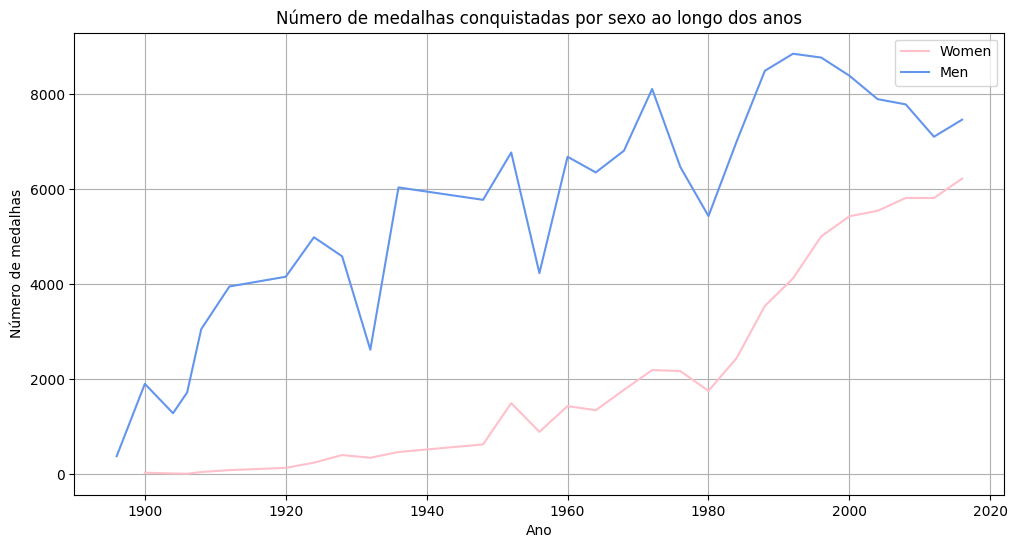

In [32]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=women_medals_by_year, x='Year', y='Total medals', label='Women', color='pink')
sns.lineplot(data=men_medals_by_year, x='Year', y='Total medals', label='Men', color='cornflowerblue')
plt.title('Número de medalhas conquistadas por sexo ao longo dos anos')
plt.xlabel('Ano')
plt.ylabel('Número de medalhas')
plt.legend()
plt.grid(True)
plt.show()

### Países participantes ao longo das edições

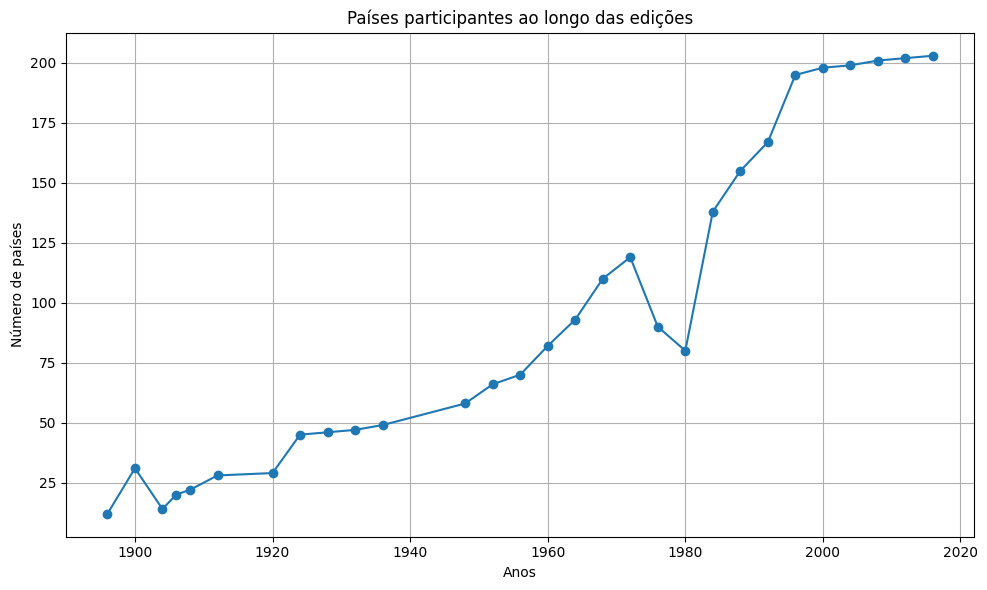

In [33]:
count_countries = (summer_olympic.groupby('Year')['region']
                                .nunique()
                                .reset_index()
                                .rename(columns={'region': 'Countries'}))

plt.figure(figsize=(10, 6))
plt.plot(count_countries['Year'], count_countries['Countries'], marker='o', linestyle='-')
plt.title('Países participantes ao longo das edições')
plt.xlabel('Anos')
plt.ylabel('Número de países')
plt.grid(True)
plt.tight_layout()
plt.show()

## Proporção dos atletas participantes.

Encontrando a proporção de atletas do sexo masculino e do sexo feminino

In [34]:
male_female_participation = summer_olympic.groupby(['Year', 'Sex']).size()
total_participation = summer_olympic.groupby('Year').size()
male_female_proportion = (male_female_participation / total_participation).reset_index(name='Proportion')
male_female_proportion['Proportion'] = male_female_proportion['Proportion'] * 100
male_female_proportion.head(10)

,Year,Sex,Proportion
0,1896,M,100.000000
1,1900,F,1.704545
2,1900,M,98.295455
3,1904,F,1.229823
4,1904,M,98.770177
5,1906,F,0.634737
6,1906,M,99.365263
7,1908,F,1.515640
8,1908,M,98.484360
9,1912,F,2.153465


Plotando o gráfico

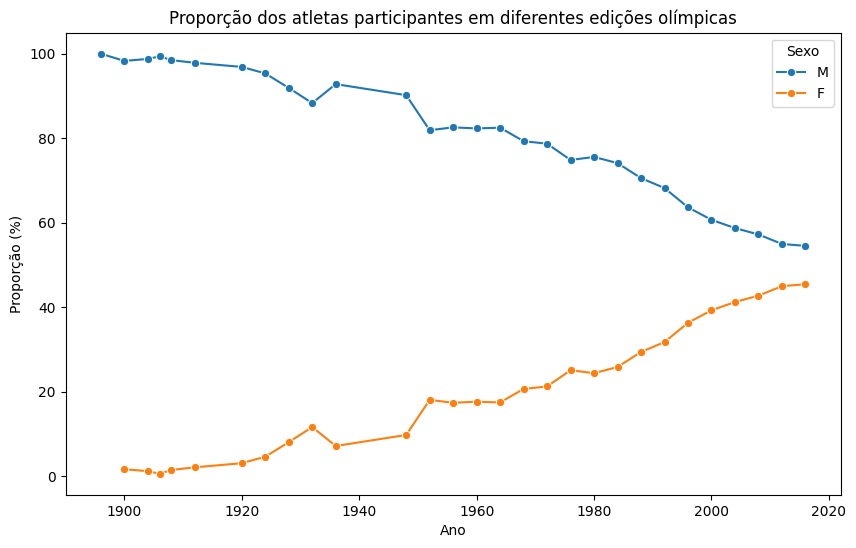

In [35]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=male_female_proportion, x='Year', y='Proportion', hue='Sex', marker='o')
plt.title('Proporção dos atletas participantes em diferentes edições olímpicas')
plt.xlabel('Ano')
plt.ylabel('Proporção (%)')
plt.legend(title='Sexo')

In [36]:
medal_winners_age_not_null = medals.dropna(subset=['Age'])

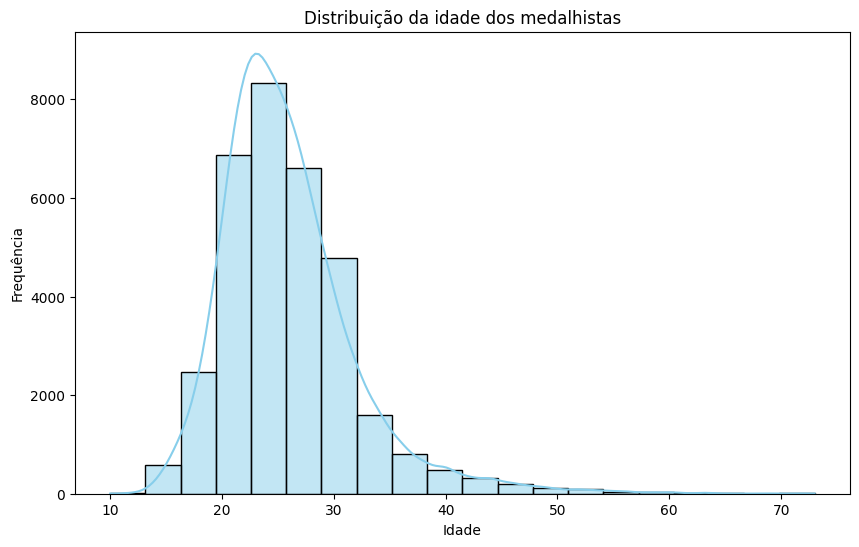

In [37]:
plt.figure(figsize=(10, 6))
sns.histplot(medal_winners_age_not_null['Age'], bins=20, kde=True, color='skyblue')
plt.title('Distribuição da idade dos medalhistas')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.show()